# Problem Set 2

### Problem 2, point 2 : writing the $ M $ matrix in the $10^{th}$ Brillouin zone 

First of all, we adimensionalize the equation (in the case of $k=0$) obtaining:
$$M_{i,j} = \sum_{j} [2\pi^{2}ij\delta_{i,j} + \tilde{V}_{0}(\delta_{i,j+1}+\delta_{i,j-1})]$$
where $$
\begin{equation}
\tilde{V}_{0} =\frac{V_{0}}{\epsilon} \\
\epsilon = \frac{\hbar^{2}}{ma^{2}}
\end{equation} $$
such that $$
\begin{equation}
G_{n}=\frac{2n\pi}{a} \quad E=\epsilon\tilde{E} \quad V_{0}=\tilde{V}_{0}\epsilon
 \end{equation} $$
 
First of all, we define the parameters and a kronecker Delta function, then the matrix $M$ can be easily implemented. 
In the following code,$\tilde{V}_{0}$is written as `V_ `, while $\hbar$ is assumed as unitary

In [1]:
V0=1
m=1
a=1
ϵ=1/(m*a*a)
V_=V0/ϵ 

function δ(i::Int,j::Int)
    return i == j ? 1 : 0
end
M = zeros(21,21)
for i in 1:21
    for j in 1:21
        M[i,j] = 2*π*π*(i-11)*(j-11)*δ(i,j)+V_*(δ(i,j+1)+δ(i,j-1))
    end
end
println("M matrix , V_{0} = 1 ")
M

M matrix , V_{0} = 1 


21×21 Array{Float64,2}:
 1973.92     1.0      0.0     0.0    …    0.0       0.0      0.0      0.0 
    1.0   1598.88     1.0     0.0         0.0       0.0      0.0      0.0 
    0.0      1.0   1263.31    1.0         0.0       0.0      0.0      0.0 
    0.0      0.0      1.0   967.221       0.0       0.0      0.0      0.0 
    0.0      0.0      0.0     1.0         0.0       0.0      0.0      0.0 
    0.0      0.0      0.0     0.0    …    0.0       0.0      0.0      0.0 
    0.0      0.0      0.0     0.0         0.0       0.0      0.0      0.0 
    0.0      0.0      0.0     0.0         0.0       0.0      0.0      0.0 
    0.0      0.0      0.0     0.0         0.0       0.0      0.0      0.0 
    0.0      0.0      0.0     0.0         0.0       0.0      0.0      0.0 
    0.0      0.0      0.0     0.0    …    0.0       0.0      0.0      0.0 
    0.0      0.0      0.0     0.0         0.0       0.0      0.0      0.0 
    0.0      0.0      0.0     0.0         0.0       0.0      0.0      0.0 
 

Eigenvalues and eigenvectors can be computed using the LinearAlgebra package

In [2]:
using LinearAlgebra
eigvects=eigvecs(M);
eigvalues=eigvals(M);

## Point 2.2 : plotting $|\psi_{n,k}(x)|$

Bottom band energy, V_{0} = 1 :  

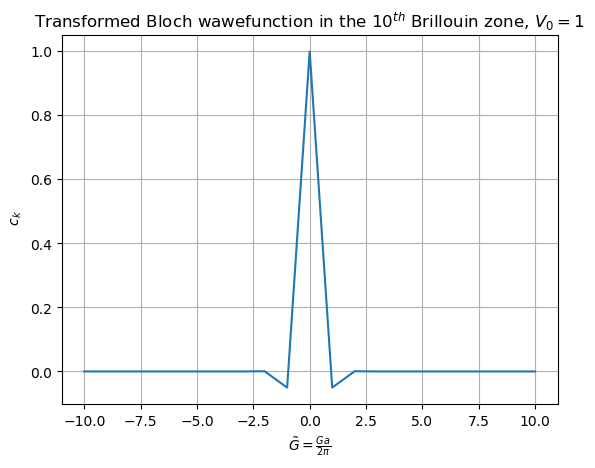

-0.10087036357809254  J


In [3]:
using PyPlot 
using LaTeXStrings
c_k=eigvects[:,1];
c_k_norm=c_k./(sum(i^2 for i in c_k))
println("Bottom band energy, V_{0} = 1 :  ", eigvalues[1]*ϵ ,"  J")
G_plot=range(-10,stop=10,step=1)
plot(G_plot,c_k_norm)
xlabel("\$ \\tilde{G} = \\frac{Ga}{2π} \$");
ylabel(" \$ c_{k} \$");
title("Transformed Bloch wawefunction in the \$ 10^{th} \$ Brillouin zone, \$ V_{0}=1 \$");
grid("on");

We take the eigenvector associated to the lowest eigenvalue as the lowest band state

Recalling that $$
\begin{equation}
\psi_{n,k}(x) = e^{ikx}u_{n,k}(x)\\
u_{n,k}(x) = \sum_{G} e^{iGx}c_{k}(G)
\end{equation} $$
the absolute value of $\psi_{n,k}(x)$ can be evaluated in the following way (suppressing the $n=0$ index) : $$
\begin{equation}
|\psi(x)_{k}|^{2} = |e^{ikx}u_{k}(x)|^{2} = |u_{k}(x)|^{2} = \sum_{G} e^{iGx}c_{k}(G)\sum_{G'} e^{-iG'x}c_{k}*(G')  
\end{equation} $$
Since $c_{k} \in \mathrm{R} \forall k$ 
$$
\begin{equation}
\sum_{G} e^{iGx}c_{k}(G)\sum_{G'} e^{-iG'x}c_{k}*(G) = \sum_{G}\sum_{G'} e^{i(G-G')x}c_{k}(G)c_{k}(G') =
\sum_{G,G'}[cos((G-G')x)+isin((G-G')x)c_{k}(G)c_{k}(G')] 
\end{equation} $$
And taking all sums, since the sine is an odd function, it can be rewritten as : 
$$|\psi(x)_{k}|^{2} = \sum_{G,G'}[cos((G-G')x)c_{k}(G)c_{k}(G')] $$

In [4]:
function unk_2(x) # $|u_{k}(x)|^{2}$
    s=0
    for n in -10:9
        for m in -10:9
            s+=c_k[n+11]*c_k[m+11]*cos((n-m)*x*2*π/(a))
        end
    end
    return s
end

unk_2 (generic function with 1 method)

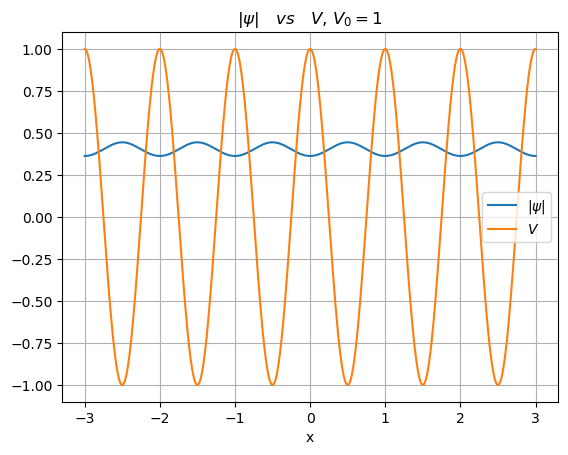

In [5]:
dx=0.01
x_plot=range(-3,step=dx,stop=3)
normalization_factor=sum(i^2 for i in unk_2.(x_plot))*dx
plot(x_plot,[sqrt.((unk_2.(x_plot))/normalization_factor) V0*cos.(2*π*x_plot/a)])
legend(["\$ |ψ| \$","\$ V \$"]);
xlabel("x");
grid("on");
title("\$ |ψ| \\quad vs \\quad V \$, \$ V_{0}=1 \$");

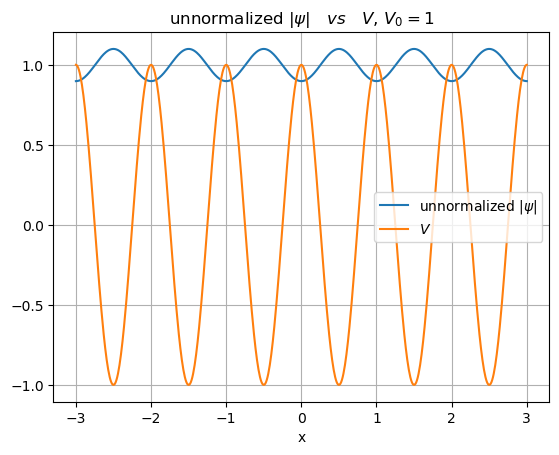

In [6]:
x_plot=range(-3,step=dx,stop=3)
grid("on")
plot(x_plot,[sqrt.((unk_2.(x_plot))) V0*cos.(2*π*x_plot/a)])
legend(["unnormalized \$ |ψ| \$","\$ V \$"]);
xlabel("x");
title("unnormalized \$ |ψ| \\quad vs \\quad V \$, \$ V_{0}=1 \$");

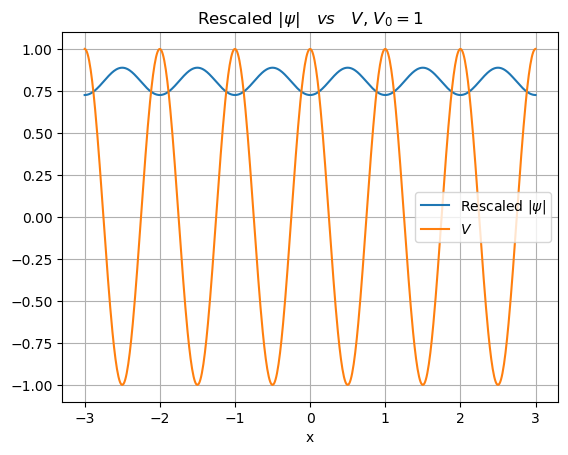

In [7]:
plot(x_plot,[2*sqrt.((unk_2.(x_plot))/normalization_factor) V0*cos.(2*π*x_plot/a)])
grid("on")
legend(["Rescaled \$ |ψ| \$","\$ V \$"]);
xlabel("x");
title("Rescaled \$ |ψ| \\quad vs \\quad V \$, \$ V_{0}=1 \$");

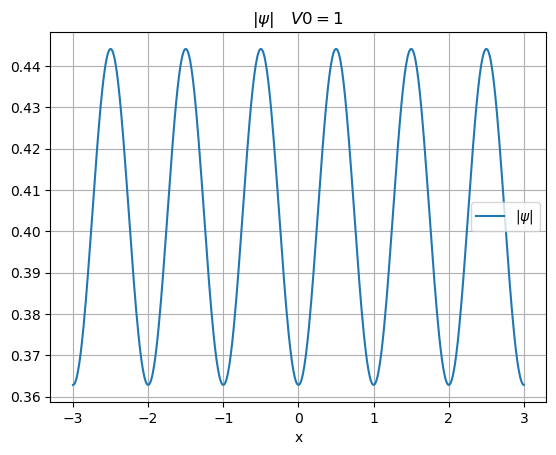

In [8]:
plot(x_plot,sqrt.((unk_2.(x_plot))/normalization_factor))
legend(["\$ |ψ| \$"]);
xlabel("x");
title("\$ |ψ| \\quad V0=1 \$");
grid("on");

### Setting $V_{0}=100$ :

In [9]:
V0=100
V_=V0/ϵ
M = zeros(21,21)
for i in 1:21
    for j in 1:21
        M[i,j] =  2*π*π*(i-11)*(j-11)*δ(i,j)+V_*(δ(i,j+1)+δ(i,j-1))
    end
end
println("M matrix , V_{0} = 100 ")
display(M)
eigvects=eigvecs(M);
eigvalues=eigvals(M);
c_k=eigvects[:,1];
c_k_norm=c_k./(sum(i^2 for i in c_k))
println("Bottom band energy, V_{0} = 100 : ", eigvalues[1]*ϵ ,"  J")

21×21 Array{Float64,2}:
 1973.92   100.0      0.0     0.0    …    0.0       0.0      0.0      0.0 
  100.0   1598.88   100.0     0.0         0.0       0.0      0.0      0.0 
    0.0    100.0   1263.31  100.0         0.0       0.0      0.0      0.0 
    0.0      0.0    100.0   967.221       0.0       0.0      0.0      0.0 
    0.0      0.0      0.0   100.0         0.0       0.0      0.0      0.0 
    0.0      0.0      0.0     0.0    …    0.0       0.0      0.0      0.0 
    0.0      0.0      0.0     0.0         0.0       0.0      0.0      0.0 
    0.0      0.0      0.0     0.0         0.0       0.0      0.0      0.0 
    0.0      0.0      0.0     0.0         0.0       0.0      0.0      0.0 
    0.0      0.0      0.0     0.0         0.0       0.0      0.0      0.0 
    0.0      0.0      0.0     0.0    …    0.0       0.0      0.0      0.0 
    0.0      0.0      0.0     0.0         0.0       0.0      0.0      0.0 
    0.0      0.0      0.0     0.0         0.0       0.0      0.0      0.0 
 

M matrix , V_{0} = 100 
Bottom band energy, V_{0} = 100 : -156.84240841528765  J


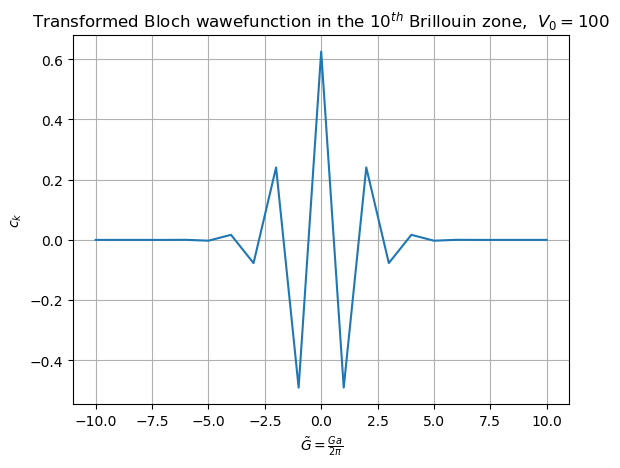

Transformed Bloch function


In [10]:
println("Transformed Bloch function")
plot(G_plot,c_k_norm)
xlabel("\$ \\tilde{G} = \\frac{Ga}{2π} \$");
ylabel("\$ c_{k} \$ ");
title("Transformed Bloch wawefunction in the \$ 10^{th} \$ Brillouin zone,  \$ V_{0}=100 \$");
grid("on");

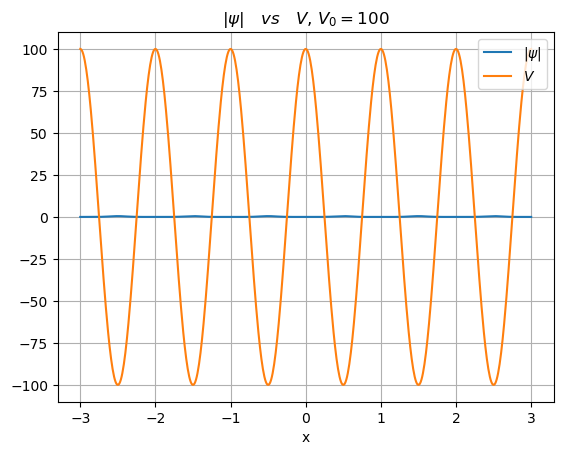

In [11]:
normalization_factor=sum(i^2 for i in unk_2.(x_plot))*dx
plot(x_plot,[sqrt.((unk_2.(x_plot))/normalization_factor) V0*cos.(2*π*x_plot/a)])
legend(["\$ |ψ| \$","\$ V \$"]);
xlabel("x");
grid("on");
title("\$ |ψ| \\quad vs \\quad V \$, \$ V_{0}=100 \$");

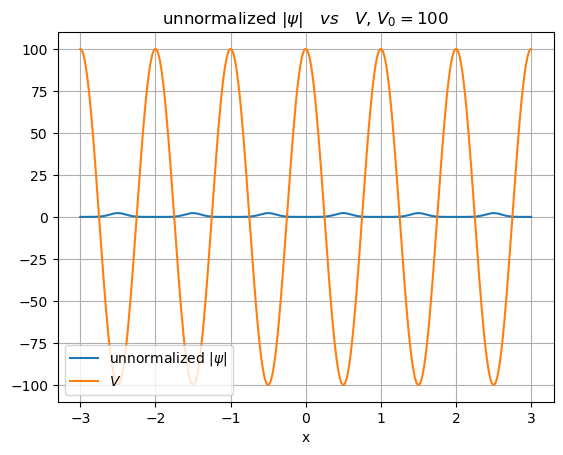

In [12]:
plot(x_plot,[sqrt.((unk_2.(x_plot))) V0*cos.(2*π*x_plot/a)])
legend(["unnormalized \$ |ψ| \$","\$ V \$"]);
xlabel("x");
grid("on");
title("unnormalized \$ |ψ| \\quad vs \\quad V \$, \$ V_{0}=100 \$");

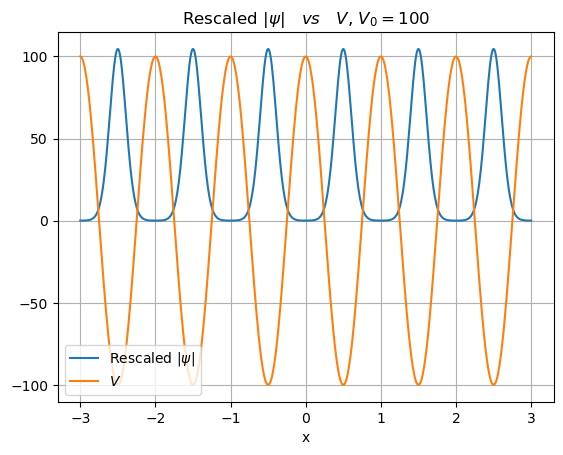

In [13]:
plot(x_plot,[215*sqrt.((unk_2.(x_plot))/normalization_factor) V0*cos.(2*π*x_plot/a)])
grid("on");
legend(["Rescaled \$ |ψ| \$","\$ V \$"]);
xlabel("x");
title("Rescaled \$ |ψ| \\quad vs \\quad V \$, \$ V_{0}=100 \$");

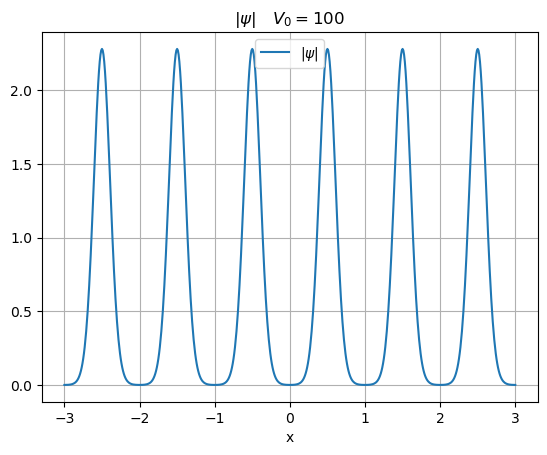

In [14]:
plot(x_plot,sqrt.(unk_2.(x_plot)))
legend(["\$ |ψ| \$"]);
xlabel("x");
grid("on");
title("\$ |ψ| \\quad V_{0}=100 \$");